# Project: Investigate a Dataset (The Movie Database Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">*Conclusions Under The Respective Graphs</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset I have contains data regarding more than 10000 movies. In the below analysis, I aim to explore the properties of movies collected over years. I have added the "movie_performance" column to know the performance of a given movie and relate it to other variables. The movie performance was calculated using the budget and revenue values that were adjusted for inflation.

> Essential questions revolve around the obivous relations between variables (i.e. the correlation between the budget and revenue). Other core questions explore the performance of movies under the supervision of given directors and the types of genres that are associated with high movie performane values.

<a id='wrangling'></a>
## Data Wrangling


### Importing Libraries and Loading The Dataset

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### General Properties 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
# check for duplicate rows
df.duplicated().sum()

1

In [5]:
# remove duplicate rows
df.drop_duplicates(inplace = True)

In [6]:
print('The dataset has {} rows and {} columns'.format(df.shape[0],df.shape[1]))

The dataset has 10865 rows and 21 columns


- We can see that the "release data column" is object (string). It would be better to convert it to datatime for future investigation.

In [7]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [8]:
# Add the new "Day" and "Month" columns 
df['day'] = df['release_date'].dt.day  # change this 
df['month'] = df['release_date'].dt.month 
df[['day','month']]

,day,month
0,9,6
1,13,5
2,18,3
3,15,12
4,1,4
...,...,...
10861,15,6
10862,21,12
10863,1,1
10864,2,11


In [9]:
# convert to real months names
def convert_to_month(number):
    lst = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    month = lst[number-1]
    return month 

df['month'] = df['month'].apply(convert_to_month)
df['month']

0            June
1             May
2           March
3        December
4           April
           ...   
10861        June
10862    December
10863     January
10864    November
10865    November
Name: month, Length: 10865, dtype: object

In [10]:
# check for NaN values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
day                        0
month                      0
dtype: int64

- Seems like most of the missing data are in the string format, which is irrelevant to my future analysis 
- If I try to remove the rows with NaN values, other important numeric values would be removed 
- And this would affect other describtive statistics 

In [11]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,day,month
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,9,June
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,13,May
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,18,March
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,15,December
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1,April


<a id='eda'></a>
## Exploratory Data Analysis




### General Statistics and Relations 

In [12]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,day
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07,15.002209
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08,8.705805
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,1.000000
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,8.000000
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,15.000000
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07,22.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,31.000000


- Types of visuals used:
  - Histograms 
  - Bars 
  - Scatter Plots

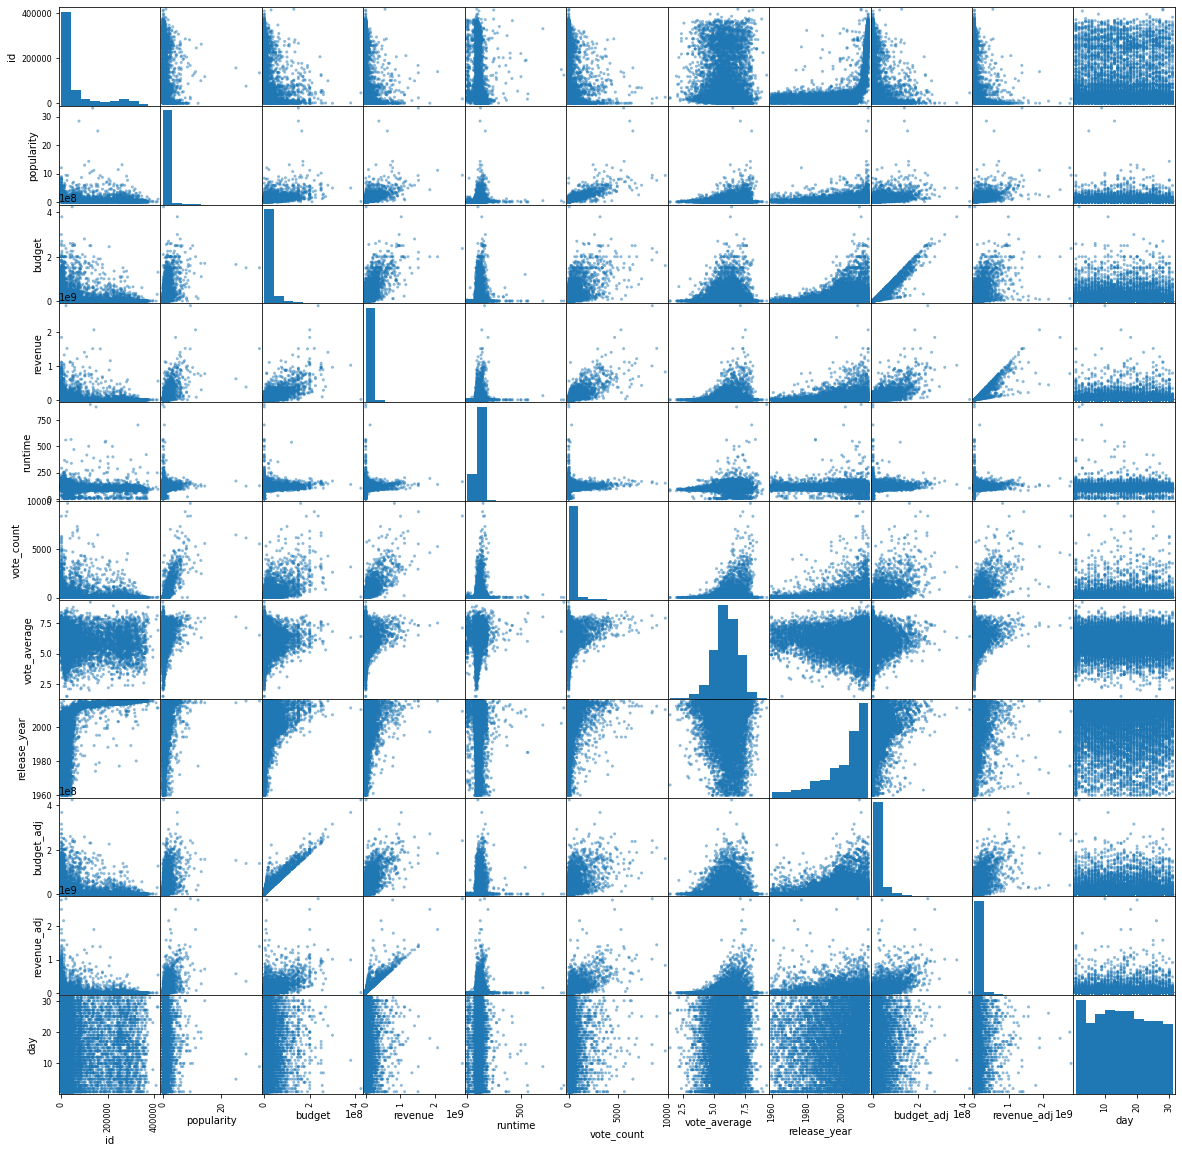

In [13]:
# General Overview 1
pd.plotting.scatter_matrix(df, figsize = (20,20));

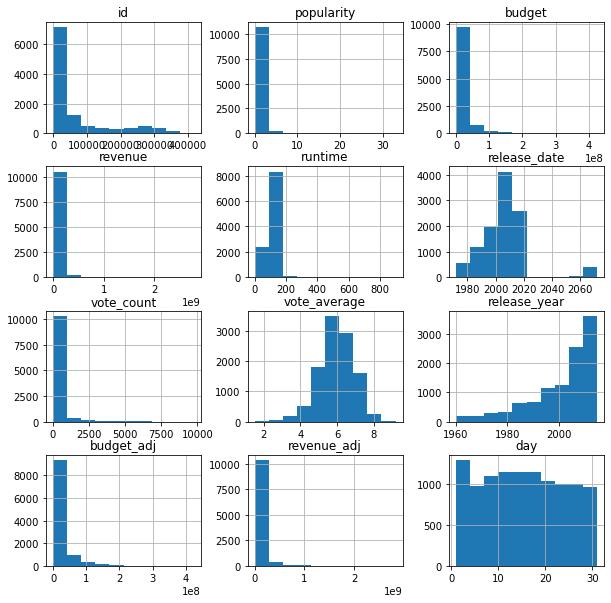

In [14]:
# General Overview 2
df.hist(figsize=(10,10));

In [57]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,day,month
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,9,June
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,13,May
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,18,March
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,15,December
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1,April


### Research Question 1 (Is There a Direct Relation Between The Budget Spend On Movies and The Revenue?)

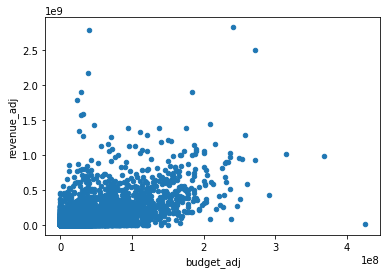

In [131]:
# relation between the budget spent on a movie and the reveneue 
df.plot(x = 'budget_adj', y = 'revenue_adj', kind = 'scatter'); 

- From the above scatter plot, it can be shown that there is no obivious relation between the budget and revenue of a given movie.


### Research Question 2  (Identify Good Directors)

In [17]:
# displays the directors who managed 1 or more movies 
df['director'].value_counts()


Woody Allen                        45
Clint Eastwood                     34
Martin Scorsese                    29
Steven Spielberg                   29
Ridley Scott                       23
                                   ..
Steve Jacobs                        1
Tim Russ                            1
Franck Mancuso                      1
Richard Brandes                     1
William Joyce|Brandon Oldenburg     1
Name: director, Length: 5067, dtype: int64

In [22]:
# add the performance column 
# performance can be measured by the difference between the revenue and budget amounts 
# the greater the amount, the more the successful the director is
df['movie_performance']  = df['revenue_adj'] - df['budget_adj']

In [23]:
df.groupby('director')['movie_performance'].sum().sort_values(ascending = False)

director
Steven Spielberg     1.305068e+10
James Cameron        6.296229e+09
George Lucas         5.844159e+09
Peter Jackson        5.644123e+09
Chris Columbus       4.353343e+09
                         ...     
Sam Weisman         -1.232507e+08
Roland JoffÃ©       -1.319827e+08
Sergey Bondarchuk   -1.404092e+08
Uwe Boll            -1.680753e+08
Sngmoo Lee          -4.139124e+08
Name: movie_performance, Length: 5067, dtype: float64

- We can see the most successful directors from top to button, according to the budget-revenue info

In [25]:
# I am interested in drawing more conlcusions about the director who made the highest number of movies 
first_director = df[df['director'] == 'Steven Spielberg']


In [26]:
# track the performance of the first director over time 
# sort the dataframe by years 
first_director.sort_values('release_year',inplace = True)

<ipython-input-26-fb0b671b5929>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_director.sort_values('release_year',inplace = True)


<ipython-input-30-fecbbc258392>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_director['performance'] = first_director['revenue']- first_director['budget']


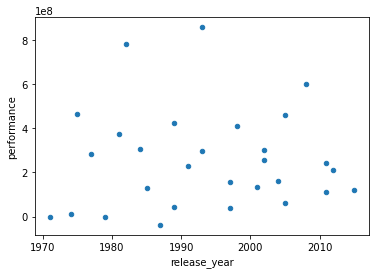

In [30]:
first_director['performance'] = first_director['revenue']- first_director['budget']
first_director.plot(x = 'release_year', y = 'performance', kind = 'scatter');

- We can see that there is no relation between how recent the year is and the performance of that director, his level is fluctuating.

In [31]:
# display the relase date of the highest performance value
first_director[first_director['performance']==first_director['performance'].max()]['release_date']

10223   1993-06-11
Name: release_date, dtype: datetime64[ns]

#### Is There a Direct Relationship Between Popularity And Overall Performance?

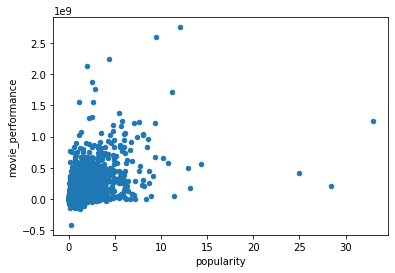

In [33]:
df.plot(x = 'popularity', y = 'movie_performance', kind = 'scatter'); 

- Seems like there is no obivious relation, except for popularities higher than or equall to 10

#### Same Approach Can Be Used to Investigate Production Companies' Performance 

### Research Question 3 (How Does The  Performance of Movies Change Over Years?)

In [35]:
year_performance = df.groupby('release_year')['movie_performance'].sum()
year_performance

release_year
1960    9.064920e+08
1961    2.127059e+09
1962    1.159535e+09
1963    8.122237e+08
1964    2.119616e+09
1965    2.684326e+09
1966    1.826083e+08
1967    4.165111e+09
1968    1.208618e+09
1969    1.199719e+09
1970    2.433320e+09
1971    1.771264e+09
1972    2.390620e+09
1973    5.691004e+09
1974    3.252899e+09
1975    3.651546e+09
1976    2.601170e+09
1977    7.263931e+09
1978    3.880149e+09
1979    4.296455e+09
1980    3.720757e+09
1981    3.359502e+09
1982    4.565944e+09
1983    3.915414e+09
1984    4.001430e+09
1985    4.311887e+09
1986    4.572143e+09
1987    5.282555e+09
1988    5.189083e+09
1989    7.185924e+09
1990    6.717725e+09
1991    5.188128e+09
1992    7.205059e+09
1993    7.812296e+09
1994    7.158756e+09
1995    9.001435e+09
1996    6.428988e+09
1997    8.020467e+09
1998    6.679802e+09
1999    7.318230e+09
2000    6.617644e+09
2001    9.566371e+09
2002    1.060605e+10
2003    1.054773e+10
2004    1.110978e+10
2005    1.024285e+10
2006    9.702090e+09


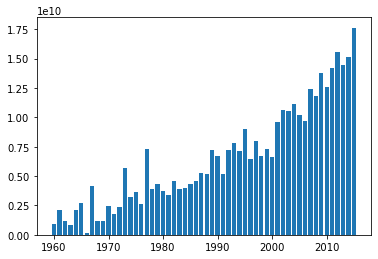

In [36]:
plt.bar(year_performance.index,year_performance);

- The more new the year is, the more it the overall performance is 
- There are some exceptions for years that have lower performance than the years just before them 
- But the first point is a general trend

### Research Question 4 ( What Are The Months of The Highest Performance Values?)

In [38]:
month_performance = df.groupby('month')['movie_performance'].sum()
month_performance

month
April        1.935477e+10
August       1.940395e+10
December     5.848403e+10
February     1.268974e+10
January      1.024516e+10
July         4.024420e+10
June         5.816358e+10
March        2.685383e+10
May          4.302995e+10
November     4.001175e+10
October      2.266025e+10
September    1.630338e+10
Name: movie_performance, dtype: float64

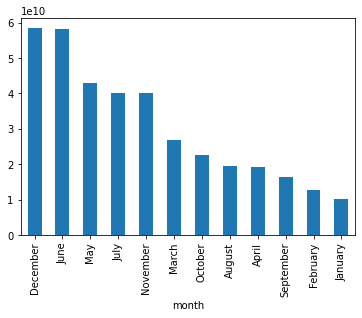

In [40]:
# sort the months before displaying them 
month_performance.sort_values(ascending = False, inplace = True)
month_performance.plot(kind = 'bar');

- The month "December" has the highest performance values accross years 
- Companies can focus its production in such months 
- They can also research on why other months such as "January" and "February" have such lower performance values 

#### We can adopt a similar approach if we are interested in knowing the perfomanc values of each month in recent years 

### Research Question 6 (Which Genres Correlate With Higher Performance?)

In [45]:
high_performance= df[df['movie_performance']>df['movie_performance'].mean()]

In [52]:
high_performance.sort_values('movie_performance', ascending = False,inplace = True)

<ipython-input-52-f37d1c2b6af7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_performance.sort_values('movie_performance', ascending = False,inplace = True)


In [87]:
# here we can see which genres correspond to high performance over different years 
high_performance['genres']


1329                      Adventure|Action|Science Fiction
1386              Action|Adventure|Fantasy|Science Fiction
5231                                Drama|Romance|Thriller
10594                                Drama|Horror|Thriller
9806                             Horror|Thriller|Adventure
                               ...                        
4212     Adventure|Fantasy|Action|Thriller|Science Fiction
3203                                                Comedy
751                                                  Drama
7717                                  Crime|Drama|Thriller
9072                        Horror|Mystery|Science Fiction
Name: genres, Length: 2074, dtype: object

In [89]:
# get the frequency of each genre 
genre_frequency = dict()
for i in range(2074):
    genre_list = high_performance["genres"].iloc[i].split('|')
    for genre in genre_list:
        if genre not in genre_frequency:
            genre_frequency[genre]=1
        else:
            genre_frequency[genre]+=1

In [112]:
genre_frequency

{'Adventure': 496,
 'Action': 648,
 'Science Fiction': 280,
 'Fantasy': 256,
 'Drama': 831,
 'Romance': 361,
 'Thriller': 604,
 'Horror': 210,
 'Family': 309,
 'Crime': 339,
 'Mystery': 168,
 'Animation': 143,
 'Comedy': 792,
 'Music': 68,
 'War': 66,
 'Western': 28,
 'History': 67,
 'Documentary': 8,
 'Foreign': 2,
 'TV Movie': 1}

In [127]:
# add "others" to include genres weren't common among high performing movies 
genre_frequency.pop("Music",None)
genre_frequency.pop("War",None)
genre_frequency.pop("Music",None)
genre_frequency.pop("Western",None)
genre_frequency.pop("History",None)
genre_frequency.pop("Documentary",None)
genre_frequency.pop("Foreign",None)
genre_frequency.pop("TV Movie",None)

1

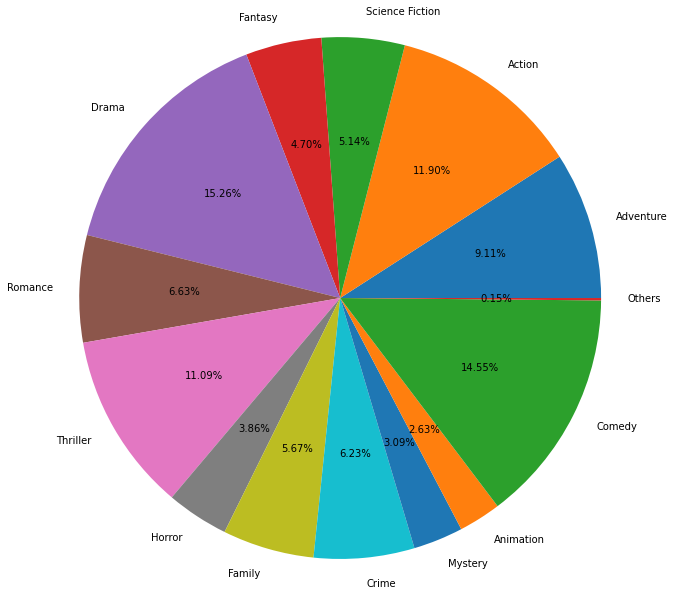

In [128]:
# display a pie chart
labels = genre_frequency.keys()
values = genre_frequency.values()
#plt.figure(figsize = (15,15))
plt.pie(values , labels = labels,autopct = '%0.2f%%', radius = 3);


### Research Question 7 (What Kind of Properties Are Associated With Higher Perfromance? Should A Movie Company/Director Aim To Increase The Run Time To Obtain Higher Performance?)

In [129]:
high_performance.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,day,movie_performance
count,2074.000000,2074.000000,2.074000e+03,2.074000e+03,2074.000000,2074.000000,2074.000000,2074.000000,2.074000e+03,2.074000e+03,2074.000000,2.074000e+03
mean,32739.509161,1.584373,4.393905e+07,1.835373e+08,112.395371,795.523626,6.350338,1998.528930,5.195173e+07,2.387214e+08,15.635487,1.867697e+08
std,61850.196234,1.829812,4.932790e+07,2.122043e+08,24.461453,1086.790404,0.729710,12.784472,5.129246e+07,2.543524e+08,8.378942,2.285916e+08
min,11.000000,0.010335,0.000000e+00,6.000000e+06,26.000000,10.000000,3.400000,1960.000000,0.000000e+00,3.390086e+07,1.000000,3.382138e+07
25%,2082.750000,0.643243,8.000000e+06,6.080195e+07,97.000000,151.000000,5.900000,1990.000000,1.423444e+07,8.703648e+07,9.000000,6.027710e+07
50%,9988.000000,1.110089,2.800000e+07,1.151028e+08,109.000000,388.000000,6.300000,2002.000000,3.592029e+07,1.540857e+08,16.000000,1.064277e+08
75%,21624.250000,1.871505,6.100000e+07,2.175141e+08,123.000000,962.500000,6.900000,2009.000000,7.592956e+07,2.900707e+08,23.000000,2.148881e+08
max,417859.000000,32.985763,3.800000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09,31.000000,2.750137e+09


<AxesSubplot:xlabel='runtime', ylabel='movie_performance'>

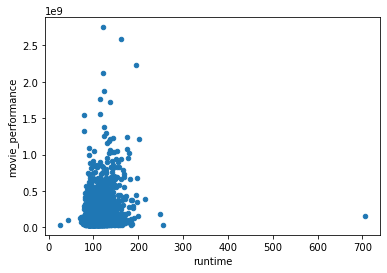

In [130]:
high_performance.plot(x = 'runtime',y='movie_performance',kind = 'scatter');

- There is no direct relation between the runtime and performance of a given movie 
- Normal runtime is almost between 100 and 200 minutes 